# Time Series

In [124]:
import pandas as pd
import numpy as np
from numpy.random import standard_normal as snormal

## Date and Time Data Types and Tools

In [2]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2023, 3, 26, 10, 23, 34, 133282)

In [3]:
delta = datetime(2011,1,7)- datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [4]:
from datetime import timedelta

start = datetime(2011, 1, 7)

start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

### Converting between String and Datetime

In [5]:
stamp = datetime(2011, 1, 3)
str(stamp), stamp.strftime('%Y-%m-%d')

('2011-01-03 00:00:00', '2011-01-03')

In [6]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [7]:
date_strings = ['7/6/2011', '8/6/2011']

[datetime.strptime(date_string, '%m/%d/%Y') for date_string in date_strings]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [8]:
date_strings = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(date_strings)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [9]:
idx = pd.to_datetime(date_strings + [None])
idx, pd.isna(idx)

(DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None),
 array([False, False,  True]))

## Time Series Basics

In [10]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02    0.743835
2011-01-05    0.812123
2011-01-07   -0.285173
2011-01-08    0.551375
2011-01-10   -0.382344
2011-01-12    1.039549
dtype: float64

In [11]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [12]:
ts + ts[::2]

2011-01-02    1.487670
2011-01-05         NaN
2011-01-07   -0.570347
2011-01-08         NaN
2011-01-10   -0.764687
2011-01-12         NaN
dtype: float64

In [14]:
ts.index.dtype

dtype('<M8[ns]')

In [16]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

## Indexing, Selection, Subsetting


In [17]:
ts[stamp]

0.7438350353224357

In [18]:
ts['2011-01-10']

-0.3823437428753618

In [19]:
longer_ts = pd.Series(np.random.standard_normal(1000), index=pd.date_range('2000-01-01', periods=1000))
longer_ts

2000-01-01   -0.654980
2000-01-02    0.253132
2000-01-03    1.496981
2000-01-04   -0.017869
2000-01-05   -1.289722
                ...   
2002-09-22    0.918882
2002-09-23   -2.203632
2002-09-24    0.857916
2002-09-25    0.225205
2002-09-26    0.980248
Freq: D, Length: 1000, dtype: float64

In [20]:
longer_ts['2001']

2001-01-01    0.303013
2001-01-02   -1.244360
2001-01-03    0.622344
2001-01-04   -0.119544
2001-01-05    0.447838
                ...   
2001-12-27   -2.051762
2001-12-28   -1.053800
2001-12-29   -1.044381
2001-12-30   -1.210734
2001-12-31   -0.872598
Freq: D, Length: 365, dtype: float64

In [22]:
longer_ts['2001-05']

2001-05-01    2.036566
2001-05-02    0.797338
2001-05-03   -0.070073
2001-05-04   -0.609235
2001-05-05   -0.039621
2001-05-06   -1.916068
2001-05-07    0.465996
2001-05-08    1.664803
2001-05-09    0.398831
2001-05-10   -1.047038
2001-05-11    0.069313
2001-05-12    1.330804
2001-05-13    0.008863
2001-05-14    0.506753
2001-05-15   -1.449312
2001-05-16   -0.437087
2001-05-17   -0.837458
2001-05-18    0.767842
2001-05-19    0.848686
2001-05-20   -1.429985
2001-05-21   -0.793798
2001-05-22    0.968939
2001-05-23   -0.489974
2001-05-24    0.019839
2001-05-25   -1.155528
2001-05-26   -0.346562
2001-05-27    0.317352
2001-05-28    1.429982
2001-05-29   -0.158651
2001-05-30   -1.395616
2001-05-31    0.377413
Freq: D, dtype: float64

In [23]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.285173
2011-01-08    0.551375
2011-01-10   -0.382344
2011-01-12    1.039549
dtype: float64

In [24]:
ts[datetime(2011,1,7):datetime(2011,1,10)]

2011-01-07   -0.285173
2011-01-08    0.551375
2011-01-10   -0.382344
dtype: float64

In [25]:
ts['2011-01-06':'2011-01-11']

2011-01-07   -0.285173
2011-01-08    0.551375
2011-01-10   -0.382344
dtype: float64

In [26]:
ts.truncate(after='2011-01-09')

2011-01-02    0.743835
2011-01-05    0.812123
2011-01-07   -0.285173
2011-01-08    0.551375
dtype: float64

In [28]:
dates = pd.date_range('2000-01-01', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.standard_normal((100,4)), index = dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df['2001-05']

C:\Users\William Costa\AppData\Local\Temp\ipykernel_16828\251471774.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  long_df['2001-05']


,Colorado,Texas,New York,Ohio
2001-05-02,-0.260162,-1.586096,-0.569951,0.540471
2001-05-09,1.209989,-0.029458,0.007118,0.108576
2001-05-16,-1.154959,-0.079556,-0.231399,-1.289475
2001-05-23,-0.330119,-0.560760,-1.055577,-1.149331
2001-05-30,-1.156561,0.674499,-1.053509,-0.330035


## Time Series With Duplicate Indices

In [29]:
dates = pd.DatetimeIndex(
    ['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02', '2000-01-03'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [31]:
dup_ts.index.is_unique

False

In [ ]:
dup_ts['2000-01-03']

In [35]:
grouped = dup_ts.groupby(level=0)
grouped.mean(), grouped.count()

(2000-01-01    0.0
 2000-01-02    2.0
 2000-01-03    4.0
 dtype: float64,
 2000-01-01    1
 2000-01-02    3
 2000-01-03    1
 dtype: int64)

## Date Ranges, Frequencies and Shifting

In [37]:
resampler = ts.resample('D')
resampler

### Generating Date Ranges

In [38]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [39]:
pd.date_range(start='2012-04-01',
              periods=20), pd.date_range(end='2012-04-01', periods=20)


(DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
                '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
                '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
                '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
                '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
               dtype='datetime64[ns]', freq='D'),
 DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
                '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
                '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
                '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
                '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
               dtype='datetime64[ns]', freq='D'))

In [51]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [52]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

In [54]:
from pandas.tseries.offsets import Hour, Minute

Hour(), Hour(4)

(<Hour>, <4 * Hours>)

In [55]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [56]:
Hour(2) + Minute(30)

<150 * Minutes>

In [57]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [59]:
monthly_dates = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
monthly_dates

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Shifting (Leading and Lagging) Data

In [60]:
ts = pd.Series(np.random.standard_normal(4), index=pd.date_range('2000-01-01', periods=4, freq='M'))
ts

2000-01-31    0.028185
2000-02-29   -1.091865
2000-03-31   -0.755839
2000-04-30    2.354911
Freq: M, dtype: float64

In [61]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.028185
2000-04-30   -1.091865
Freq: M, dtype: float64

In [62]:
ts.shift(-2)

2000-01-31   -0.755839
2000-02-29    2.354911
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [63]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29   -39.738667
2000-03-31    -0.307754
2000-04-30    -4.115625
Freq: M, dtype: float64

In [64]:
ts.shift(2, freq='M')

2000-03-31    0.028185
2000-04-30   -1.091865
2000-05-31   -0.755839
2000-06-30    2.354911
Freq: M, dtype: float64

In [66]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.028185
2000-02-29 01:30:00   -1.091865
2000-03-31 01:30:00   -0.755839
2000-04-30 01:30:00    2.354911
dtype: float64

### Shifting Dates with offsets

In [67]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [69]:
now + MonthEnd(), now + MonthEnd() * 3,

(Timestamp('2011-11-30 00:00:00'), Timestamp('2012-01-31 00:00:00'))

In [71]:
offset = MonthEnd()
offset.rollforward(now), offset.rollback(now)

(Timestamp('2011-11-30 00:00:00'), Timestamp('2011-10-31 00:00:00'))

In [73]:
ts = pd.Series(np.random.standard_normal(20), index=pd.date_range('2000-01-15', periods=20, freq='4D'))
ts.groupby(MonthEnd().rollforward).mean(), ts.resample('M').mean()

(2000-01-31   -0.312041
 2000-02-29    0.151276
 2000-03-31   -0.196738
 dtype: float64,
 2000-01-31   -0.312041
 2000-02-29    0.151276
 2000-03-31   -0.196738
 Freq: M, dtype: float64)

## Time Zone Handling

In [78]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [80]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [81]:
dates = pd.date_range('2012-03-09 09:30', periods=6)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00    0.463538
2012-03-10 09:30:00    1.198360
2012-03-11 09:30:00   -0.050635
2012-03-12 09:30:00   -0.153573
2012-03-13 09:30:00    0.622137
2012-03-14 09:30:00    1.493675
Freq: D, dtype: float64

In [82]:
print(ts.index.tz)

None


In [84]:
dates = pd.date_range('2012-03-09 09:30', periods=10, tz='UTC')
dates

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [87]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.463538
2012-03-10 09:30:00+00:00    1.198360
2012-03-11 09:30:00+00:00   -0.050635
2012-03-12 09:30:00+00:00   -0.153573
2012-03-13 09:30:00+00:00    0.622137
2012-03-14 09:30:00+00:00    1.493675
Freq: D, dtype: float64

In [88]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [89]:
ts_eastern = ts_utc.tz_convert('America/New_York')
ts_eastern

2012-03-09 04:30:00-05:00    0.463538
2012-03-10 04:30:00-05:00    1.198360
2012-03-11 05:30:00-04:00   -0.050635
2012-03-12 05:30:00-04:00   -0.153573
2012-03-13 05:30:00-04:00    0.622137
2012-03-14 05:30:00-04:00    1.493675
Freq: D, dtype: float64

In [91]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 10:30:00+01:00    0.463538
2012-03-10 10:30:00+01:00    1.198360
2012-03-11 10:30:00+01:00   -0.050635
2012-03-12 10:30:00+01:00   -0.153573
2012-03-13 10:30:00+01:00    0.622137
2012-03-14 10:30:00+01:00    1.493675
Freq: D, dtype: float64

In [93]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

## Operations with Time Zone-Aware Timestamp Objects

In [94]:
stamp = pd.Timestamp('2011-03-12 4:00')
stamp_utc = stamp.tz_localize('utc')

stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [95]:
stamp_moscow = pd.Timestamp('2011-03-12 4:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [96]:
stamp = pd.Timestamp('2012-03-11 1:30', tz='US/Eastern')
stamp + Hour() # Because of hour change

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [97]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between different Time Zones

In [98]:
dates = pd.date_range('2012-03-07 09:30', periods=10, freq='B')
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-07 09:30:00    0.106015
2012-03-08 09:30:00   -1.890722
2012-03-09 09:30:00    0.353344
2012-03-12 09:30:00   -0.492095
2012-03-13 09:30:00   -0.579473
2012-03-14 09:30:00   -2.478209
2012-03-15 09:30:00    0.440133
2012-03-16 09:30:00   -0.401411
2012-03-19 09:30:00    0.421120
2012-03-20 09:30:00   -1.270761
Freq: B, dtype: float64

In [101]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts[2:].tz_localize('Europe/Moscow')


result = ts1 + ts2
result, result.index

(2012-03-07 09:30:00+00:00   NaN
 2012-03-08 09:30:00+00:00   NaN
 2012-03-09 05:30:00+00:00   NaN
 2012-03-09 09:30:00+00:00   NaN
 2012-03-12 05:30:00+00:00   NaN
 2012-03-12 09:30:00+00:00   NaN
 2012-03-13 05:30:00+00:00   NaN
 2012-03-13 09:30:00+00:00   NaN
 2012-03-14 05:30:00+00:00   NaN
 2012-03-14 09:30:00+00:00   NaN
 2012-03-15 05:30:00+00:00   NaN
 2012-03-15 09:30:00+00:00   NaN
 2012-03-16 05:30:00+00:00   NaN
 2012-03-19 05:30:00+00:00   NaN
 2012-03-20 05:30:00+00:00   NaN
 dtype: float64,
 DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
                '2012-03-09 05:30:00+00:00', '2012-03-09 09:30:00+00:00',
                '2012-03-12 05:30:00+00:00', '2012-03-12 09:30:00+00:00',
                '2012-03-13 05:30:00+00:00', '2012-03-13 09:30:00+00:00',
                '2012-03-14 05:30:00+00:00', '2012-03-14 09:30:00+00:00',
                '2012-03-15 05:30:00+00:00', '2012-03-15 09:30:00+00:00',
                '2012-03-16 05:30:00+00:00',

## Periods and Period Arithmetic

In [102]:
p = pd.Period('2011', freq='A-DEC')
p

Period('2011', 'A-DEC')

In [104]:
p + 5, p - 2

(Period('2016', 'A-DEC'), Period('2009', 'A-DEC'))

In [105]:
pd.Period('2014', freq='A-DEC') - p 

<3 * YearEnds: month=12>

In [106]:
periods = pd.period_range('2000-01-01', '2000-06-30', freq='M')
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [108]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01    0.653838
2000-02   -1.644485
2000-03    1.015109
2000-04   -0.276781
2000-05   -1.848950
2000-06    1.483191
Freq: M, dtype: float64

In [110]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period frequency Conversion

In [113]:
p = pd.Period('2011', freq='A-DEC')
p, p.asfreq('M', how='start'), p.asfreq('M', how='end'), p.asfreq('M')

(Period('2011', 'A-DEC'),
 Period('2011-01', 'M'),
 Period('2011-12', 'M'),
 Period('2011-12', 'M'))

In [115]:
p = pd.Period('2011', freq='A-JUN')
p

Period('2011', 'A-JUN')

In [117]:
p = pd.Period('Aug-2011', 'M')
p.asfreq('A-JUN') # A-JUN (2011) -> July 2010 - June 2011; Aug-2011 belongs to A-JUN(2012) -> July 2011 - June 2012

Period('2012', 'A-JUN')

In [128]:
periods = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(snormal(len(periods)), index=periods)
ts

2006   -0.186308
2007   -0.797704
2008   -0.357202
2009    0.946048
Freq: A-DEC, dtype: float64

In [129]:
ts.asfreq('M', how='start')

2006-01   -0.186308
2007-01   -0.797704
2008-01   -0.357202
2009-01    0.946048
Freq: M, dtype: float64

In [130]:
ts.asfreq('B', how='end')

2006-12-29   -0.186308
2007-12-31   -0.797704
2008-12-31   -0.357202
2009-12-31    0.946048
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [131]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [132]:
p.asfreq('D', how='start'), p.asfreq('D', how='end')

(Period('2011-11-01', 'D'), Period('2012-01-31', 'D'))

In [134]:
p4pm = ((p.asfreq('B', how='end') - 1).asfreq('T', how='start')) + 16 * 60
p4pm # Timestamp at 4pm on the second-to-last business day of the quarter

Period('2012-01-30 16:00', 'T')

In [135]:
periods = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [141]:
new_periods = (periods.asfreq('B', 'end') - 1).asfreq('H', 'start') + 16
ts.index = new_periods.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Between Timestamps and Periods 

In [145]:
dates = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(snormal(3), index=dates)
ts

2000-01-31    1.489634
2000-02-29    0.120668
2000-03-31   -2.000264
Freq: M, dtype: float64

In [146]:
pts = ts.to_period()
pts

2000-01    1.489634
2000-02    0.120668
2000-03   -2.000264
Freq: M, dtype: float64

In [147]:
dates = pd.date_range('2000-01-29', periods=6)
ts2 = pd.Series(snormal(6), index=dates)
ts2

2000-01-29    0.082481
2000-01-30    0.398462
2000-01-31   -0.245610
2000-02-01    0.276072
2000-02-02    0.303385
2000-02-03   -2.143116
Freq: D, dtype: float64

In [148]:
ts2.to_period('M')

2000-01    0.082481
2000-01    0.398462
2000-01   -0.245610
2000-02    0.276072
2000-02    0.303385
2000-02   -2.143116
Freq: M, dtype: float64

In [149]:
ts2.to_period().to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.082481
2000-01-30 23:59:59.999999999    0.398462
2000-01-31 23:59:59.999999999   -0.245610
2000-02-01 23:59:59.999999999    0.276072
2000-02-02 23:59:59.999999999    0.303385
2000-02-03 23:59:59.999999999   -2.143116
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [150]:
location = r"C:\Users\William Costa\Documents\repositories\data_science_basic_knowledge\resources\macrodata.csv"
data = pd.read_csv(location)
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [151]:
data['year']

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [152]:
data['quarter']

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [153]:
index = pd.PeriodIndex(year=data['year'], quarter=data['quarter'], freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [156]:
data.index = index
data['infl']

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [157]:
dates = pd.date_range('2000-01-01', periods=100)
ts = pd.Series(snormal(len(dates)), index=dates)
ts

2000-01-01    0.643292
2000-01-02    0.240384
2000-01-03    0.652118
2000-01-04   -1.754100
2000-01-05   -0.680613
                ...   
2000-04-05   -0.105676
2000-04-06   -0.289970
2000-04-07   -0.172788
2000-04-08    1.243721
2000-04-09    0.049442
Freq: D, Length: 100, dtype: float64

In [158]:
ts.resample('M').mean()

2000-01-31    0.023046
2000-02-29    0.197250
2000-03-31   -0.160629
2000-04-30   -0.293628
Freq: M, dtype: float64

In [159]:
ts.resample('M', kind='period').mean()

2000-01    0.023046
2000-02    0.197250
2000-03   -0.160629
2000-04   -0.293628
Freq: M, dtype: float64

### Downsampling

In [160]:
dates = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [161]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [162]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [163]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [165]:
from pandas.tseries.frequencies import to_offset

result = ts.resample('5min', closed='right', label='right').sum()
result.index = result.index + to_offset('-1s')
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### Open-high-low-close (OHLC) resampling

In [166]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,5,11,4,11
2000-01-01 00:05:00,3,9,0,9
2000-01-01 00:10:00,8,10,8,10


### Upsampling and Interpolation

In [167]:
frame = pd.DataFrame(snormal((2, 4)), index=pd.date_range('2000-01-01', periods=2, freq='W-WED'), columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.221407,1.090427,-0.320093,1.736803
2000-01-12,1.575889,0.684647,0.934434,2.787115


In [169]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.221407,1.090427,-0.320093,1.736803
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.575889,0.684647,0.934434,2.787115


In [170]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.221407,1.090427,-0.320093,1.736803
2000-01-06,-0.221407,1.090427,-0.320093,1.736803
2000-01-07,-0.221407,1.090427,-0.320093,1.736803
2000-01-08,-0.221407,1.090427,-0.320093,1.736803
2000-01-09,-0.221407,1.090427,-0.320093,1.736803
2000-01-10,-0.221407,1.090427,-0.320093,1.736803
2000-01-11,-0.221407,1.090427,-0.320093,1.736803
2000-01-12,1.575889,0.684647,0.934434,2.787115


In [171]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.221407,1.090427,-0.320093,1.736803
2000-01-06,-0.221407,1.090427,-0.320093,1.736803
2000-01-07,-0.221407,1.090427,-0.320093,1.736803
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.575889,0.684647,0.934434,2.787115


In [173]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.221407,1.090427,-0.320093,1.736803
2000-01-13,1.575889,0.684647,0.934434,2.787115


### Resampling with Periods

In [174]:
frame = pd.DataFrame(snormal((24,4)), index=pd.period_range('1-2000', '12-2001', freq='M'), columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-1.871413,-0.546102,0.707639,2.221614
2000-02,0.466727,-1.713191,0.318122,-2.082181
2000-03,0.049219,-0.112236,-1.136811,-0.775308
2000-04,1.330854,0.404247,-0.398363,-0.565296
2000-05,-2.119499,-0.148895,-1.873758,-0.593621


In [176]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.144751,-0.25244,-0.173068,-0.151203
2001,-0.019855,-0.26380,0.289905,-0.268016


In [177]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.144751,-0.25244,-0.173068,-0.151203
2000Q2,-0.144751,-0.25244,-0.173068,-0.151203
2000Q3,-0.144751,-0.25244,-0.173068,-0.151203
2000Q4,-0.144751,-0.25244,-0.173068,-0.151203
2001Q1,-0.019855,-0.26380,0.289905,-0.268016
2001Q2,-0.019855,-0.26380,0.289905,-0.268016
2001Q3,-0.019855,-0.26380,0.289905,-0.268016
2001Q4,-0.019855,-0.26380,0.289905,-0.268016


In [178]:
annual_frame.resample('Q-DEC', convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,-0.144751,-0.25244,-0.173068,-0.151203
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.019855,-0.26380,0.289905,-0.268016


### Grouped Time Resampling

In [180]:
N = 15
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)
df = pd.DataFrame({'time': times, 'value': np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [182]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [184]:
df2 = pd.DataFrame({
    'time': times.repeat(3), 'key': np.tile(list('abc'), N),
    'value': np.arange(N * 3.)
})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [185]:
time_key = pd.Grouper(freq='5min')
time_key

TimeGrouper(freq=<5 * Minutes>, axis=0, sort=True, dropna=True, closed='left', label='left', how='mean', convention='e', origin='start_day')

## Moving Window Functions

In [188]:
close_px_all = pd.read_csv(r'C:\Users\William Costa\Documents\repositories\data_science_basic_knowledge\resources\stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

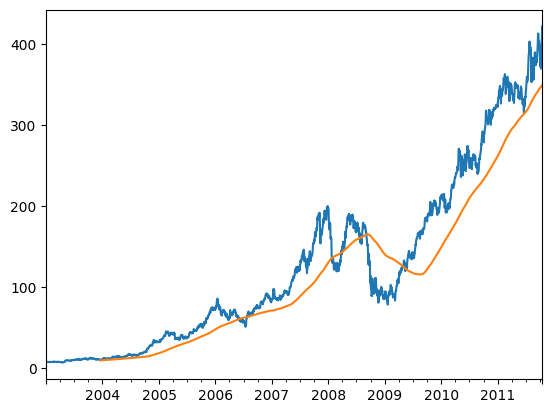

In [191]:
close_px['AAPL'].plot()
close_px['AAPL'].rolling(250).mean().plot()

<Axes: >

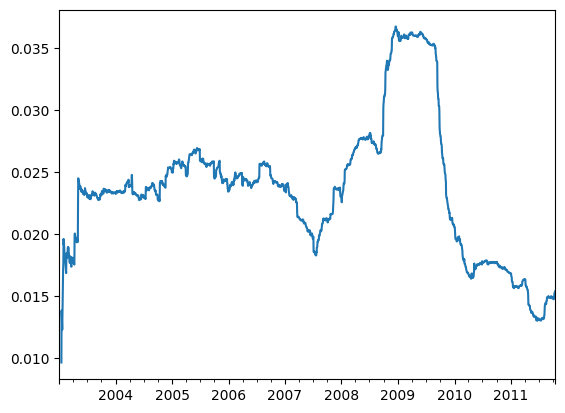

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

std250 = close_px['AAPL'].pct_change().rolling(250, min_periods=10).std()
std250.plot()

<Axes: >

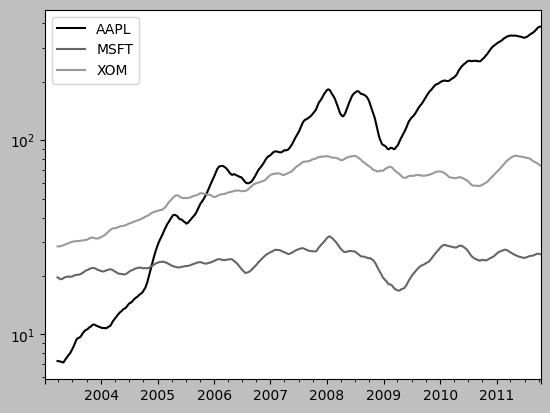

In [196]:
expanding_mean = std250.expanding().mean()
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

<Axes: >

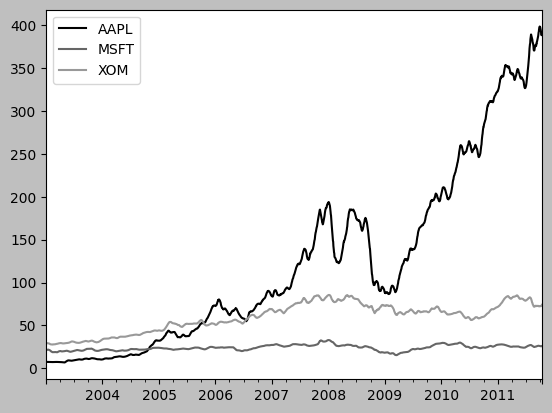

In [198]:
close_px.rolling('20D').mean().plot()

### Exponentially Weighted Functions

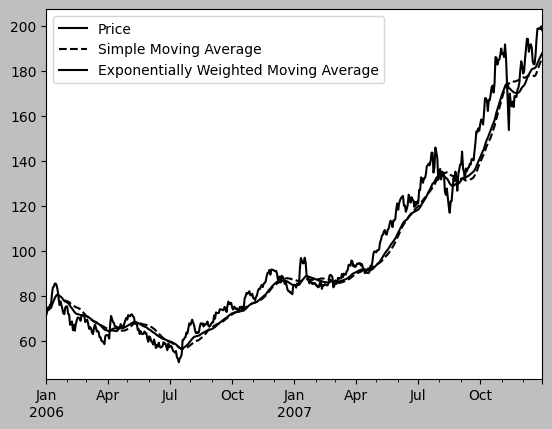

In [201]:
aapl_px = close_px['AAPL']['2006':'2007']
ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma = aapl_px.ewm(span=30).mean()
aapl_px.plot(style='k-', label='Price')
ma30.plot(style='k--', label='Simple Moving Average')
ewma.plot(style='k-', label='Exponentially Weighted Moving Average')
plt.legend()

### Binary Moving Window Functions

<Axes: >

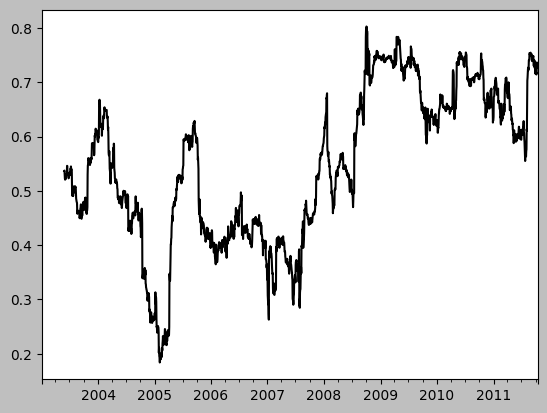

In [202]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

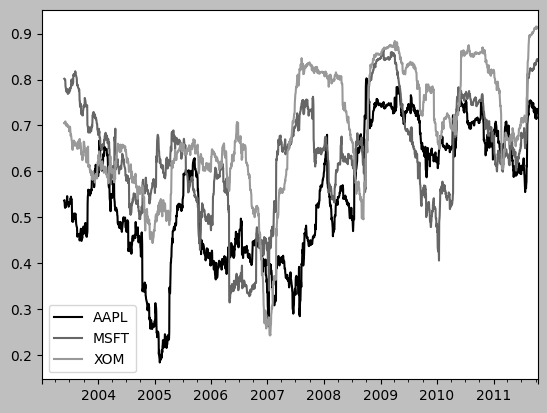

In [203]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

<Axes: >

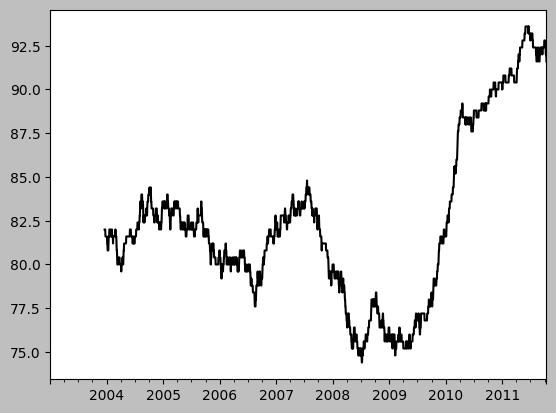

In [204]:
from scipy.stats import percentileofscore

def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns['AAPL'].rolling(250).apply(score_at_2percent)
result.plot()